# Customer Churn Analysis

## Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

## Importing the required libraries:

In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [352]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('customer_chrun.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA (Exploratory Data Analysis):

In [353]:
df.shape

(7043, 21)

We have 7043 rows and 21 columns including target variable in this dataset

In [354]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Chrun is our target column, Rest are independent columns

In [355]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Almost all the columns are object datatype except tenure and MontlyCharges

In [356]:
#lets check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in this dataset

## Lets check the number of unique values in object column

In [357]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

customerID 7043
gender 2
Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
TotalCharges 6531
Churn 2


In [358]:
#lets print out the columns with unique values
for i in df.columns[:-2]:
    if df[i].dtype == 'object':
        print('\n')
        print(i,df[i].value_counts())



customerID 4737-HOBAX    1
4433-JCGCG    1
8395-ETZKQ    1
3577-AMVUX    1
1089-XZWHH    1
             ..
7941-RCJOW    1
0970-QXPXW    1
0529-ONKER    1
4039-PIMHX    1
9629-NHXFW    1
Name: customerID, Length: 7043, dtype: int64


gender Male      3555
Female    3488
Name: gender, dtype: int64


Partner No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtyp

These are the value conut in each columns

## Dropping customer ID column

In [359]:
#we can drop cuustomer id column since it has all unique values and no use in predicting our target variable
df.drop('customerID',axis = 1,inplace = True)

In [360]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [361]:
#we can see that total charges column is object, but it should be int or float datatype
df.TotalCharges.dtype

dtype('O')

In [362]:
#lets check for null values
df.TotalCharges.isnull().sum()

0

In [363]:
#lets check for empty spaces
df.TotalCharges.value_counts()

20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
8078.1      1
4855.35     1
73.5        1
638         1
1323.7      1
Name: TotalCharges, Length: 6531, dtype: int64

we can see 11 white spaces in this column

In [364]:
df.loc[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [365]:
#lets replace white spaces with nan values
df.TotalCharges.replace(' ',np.nan,inplace=True)

In [366]:
#now we have 11 nan values
df.TotalCharges.isnull().sum()

11

In [367]:
#now there are no white spaces in this column
df.loc[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [368]:
#Lets convert this into float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)

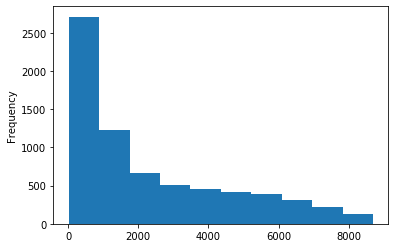

In [369]:
#Lets check for distribution of this column 
#so that we will get to know , wherther to replace with mean or median
df.TotalCharges.plot(kind = 'hist')

In [370]:
#we can see that the data right skewed in this column, so lets replace it with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [371]:
#now we have removed white spaces and replaced them with median
df.TotalCharges.isnull().sum()

0

In [372]:
#correlation
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


In [373]:
#There are not much correlation between the numerical variables
#Montly charges and total charges are having good posive correlation

In [374]:
#statistical summmary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Data visualization:

### Univariate Analysis :

#### Lets check for class imbalance problem

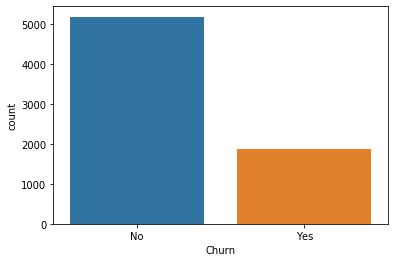

In [375]:
#lets check our traget variable for class imbalance problem
sns.countplot(x= df['Churn'] ,data=df)
plt.show()

From the above plot we can see there is a class imbalance problem in this dataset

In [376]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

we have 5174 rows for no and 1869 rows for yes

## Bivariate Analysis with Target Variable

In [377]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

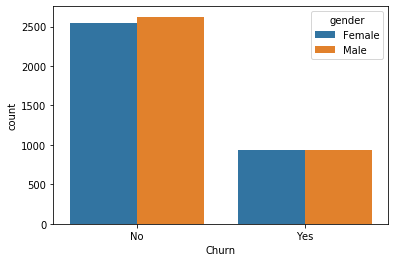

In [378]:
#Lets check this column againt our target variable
sns.countplot(x = 'Churn', hue = 'gender', data = df)
plt.show()

we can see that chrun ratio same is for both male and female for both yes and no

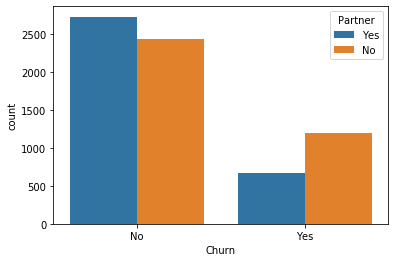

In [379]:
#Lets check this column againt our target variable
sns.countplot(x = df['Churn'], hue = df['Partner'])
plt.show()

We san see that when non parthers have churned the most in a ratio almost 1:2

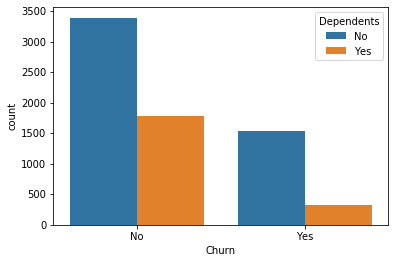

In [380]:
#Lets check this column againt our target variable
sns.countplot(x = 'Churn', hue = 'Dependents', data = df)
plt.show()

We acn see taht not dependents have churned the most

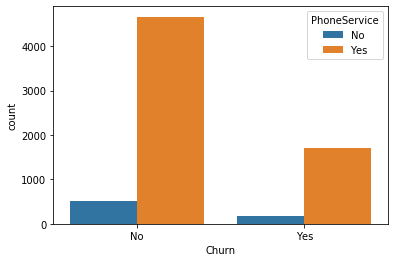

In [381]:
#Lets check this column againt our target variable
sns.countplot(x = 'Churn', hue = 'PhoneService', data = df)
plt.show()

we can see that churn is same ratio for phone service yes and no

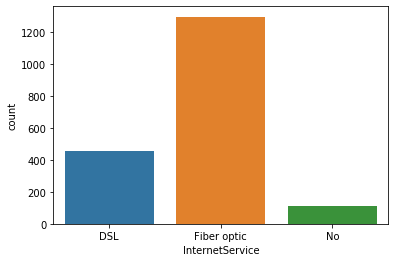

In [382]:
#Lets check this column againt our target variable
sns.countplot( x = 'InternetService', data = df.loc[df['Churn'] == 'Yes'])
plt.show()

We can see that people who used fiber optic internet service churned the most

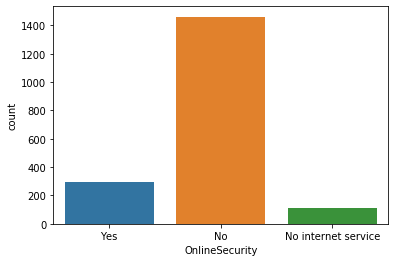

In [383]:
#Lets check this column againt our target variable
sns.countplot( x = 'OnlineSecurity', data = df.loc[df['Churn'] == 'Yes'])
plt.show()

Customers with No Online security have churned the most

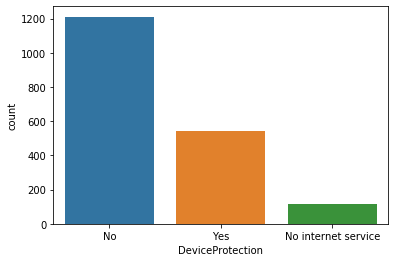

In [384]:
#Lets check this column againt our target variable
sns.countplot( x = 'DeviceProtection', data = df.loc[df['Churn'] == 'Yes'])
plt.show()

customers with no data protection have churned the most

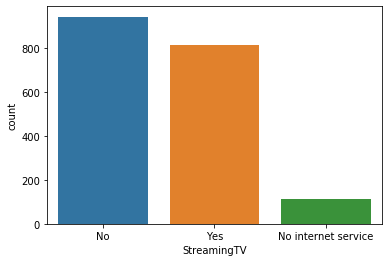

In [385]:
#Lets check this column againt our target variable
sns.countplot( x = 'StreamingTV', data = df.loc[df['Churn'] == 'Yes'])
plt.show()

We can see almost same ratio, But customers with no streaming tv has churned compared to customers with streaming tv

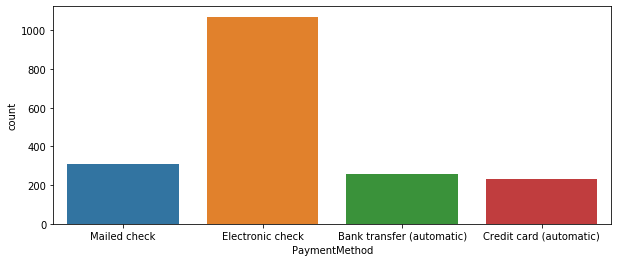

In [386]:
#Lets check this column againt our target variable
plt.figure(figsize=(10,4))
sns.countplot( x = 'PaymentMethod', data = df.loc[df['Churn'] == 'Yes'])
plt.show()

we can see that people who used electronic chcek as payment method have churned the most

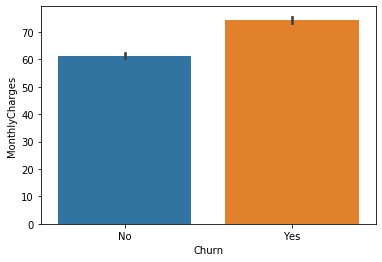

In [387]:
#Lets check this column againt our target variable
sns.barplot( x = 'Churn', y = 'MonthlyCharges', data =df)
plt.show()

We can see that customers with high montlycharges have churned the most

In [388]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

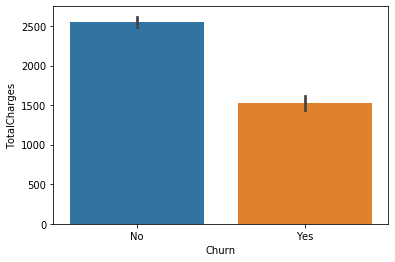

In [389]:
#Lets check this column againt our target variable
sns.barplot( x = 'Churn', y = 'TotalCharges', data =df)
plt.show()

Customers with high toatl charges have not churned, because if the total charge is high they are customers from long time

## Data Preprocessing

### Encoding the Object Columns

In [390]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [391]:
#Lets start with our Target variable

In [392]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [393]:
#function to convert our target variable
def target(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [394]:
#Lets apply the above function
df['Churn'] = df['Churn'].apply(target)

In [395]:
#To verify
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [396]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [397]:
#we can use ordinal encoding for gender,Dependents,Partner,PhoneService and PaperlessBilling columns.
#since they have only two unique values
collist = ['gender','Partner', 'Dependents','PhoneService', 'PaperlessBilling']
o_encoding = OrdinalEncoder()

for i in collist:
    if df[i].dtypes == 'object':
        df[i] = o_encoding.fit_transform(df[i].values.reshape(-1,1))

In [398]:
#For rest of the columns lets use get dummy method since all are nominal columns and more than 2 unique values
df_new = pd.get_dummies(data = df, columns = ['MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'])

In [399]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0,1.0,0.0,1,0.0,1.0,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1.0,0,0.0,0.0,34,1.0,0.0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1.0,0,0.0,0.0,2,1.0,1.0,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1.0,0,0.0,0.0,45,0.0,0.0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0.0,0,0.0,0.0,2,1.0,1.0,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


Encoding is Done for all the object columns, All the columns are now either Int or float

## Outlier Removal for Numerical Columns

In [400]:
#These are the only numerical columns in this dataset
Numerical_columns = ['tenure','MonthlyCharges', 'TotalCharges']

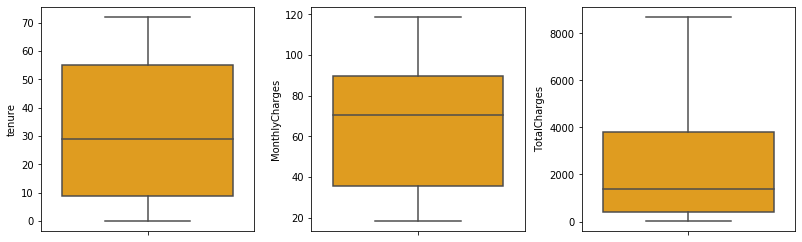

In [401]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 4
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_new[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

We can see there are no outliers in any of the numerical columns

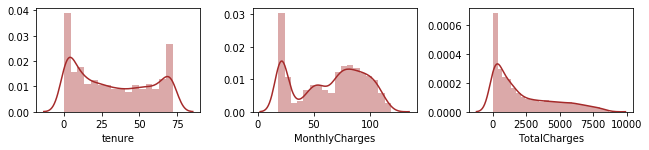

In [402]:
# Lets check the distribution
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_new[collist[i]],color='brown')
    plt.tight_layout()

we can see that data is almost normal distributed for tenture and montlycharges, but right skewed for Total charges

## Skewness Reduction

In [403]:
#Lest check the skewness of these numerical columns
for i in Numerical_columns:
    print(i, df_new[i].skew())

tenure 0.2395397495619829
MonthlyCharges -0.22052443394398033
TotalCharges 0.9637890936414893


As we already saw, Total charges colums is Right skewed so the skewness is not in range

In [404]:
#lets use sqaureroot transformation method to reduce skewness of this column
df_new['TotalCharges']= np.sqrt(df_new['TotalCharges'])

In [405]:
#lets check the skewness
df_new['TotalCharges'].skew()

0.30983834186805154

We can see that skewness has been reduced

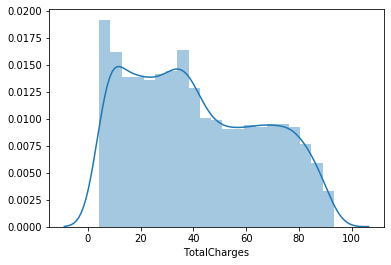

In [406]:
#lets check for distribution after skewness reduction
sns.distplot(df_new['TotalCharges'])
plt.show()

Data is almost normal distributed for this column now

## Splitting X and Y columns

In [407]:
#lets split our train and test data
Y = df_new['Churn']
X = df_new.drop('Churn',axis = 1)

In [408]:
Y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

we can see the class imbalance problem

## Handling class Imbalance problem using SMOT method

In [409]:
#To install imbalanced-learn library use "pip install imbalanced-learn" command
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, Y)

y_sm.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [410]:
#now our class imbalnace problem is sloved

## Lets Check for Best Random State 

In [411]:
maxaccu = 0
rand_state = 0
for i in range(42,100):

    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= i,stratify= y_sm )
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        rand_state = i
print('Best accuracy is {} on random state {}'.format(maxaccu,rand_state))

Best accuracy is 0.8568291611769873 on random state 71


In [412]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 71


In [413]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.22,random_state= rand_state, stratify= y_sm )

In [414]:
#now we don't have the class imbalance problem
y_train.value_counts()

0    4036
1    4035
Name: Churn, dtype: int64

## Model selection:

In [415]:
#lets Choose Among this Models
lg = LogisticRegression()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
#ensemble technique
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [416]:
model_list = [lg,dtc,knn,rf,ada]
least_diffrence = []
for m in model_list:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('The accuracy of {} is {}'.format(m,accu))
    cv = cross_val_score(m,x_sm,y_sm,cv =5)
    print("cross val score :",  cv.mean())
    diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
    a = 'diffrence b/w accurancy score and cross val score is : {:.2f}'.format(diffrence)
    print(a)
    least_diffrence.append((m,a))
    for i in ([0,1]):
        f1 = f1_score(y_test,pred,pos_label=i)
        print("f1 score for {} is {} ".format(i,f1))



LogisticRegression()
[[991 147]
 [179 960]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1138
           1       0.87      0.84      0.85      1139

    accuracy                           0.86      2277
   macro avg       0.86      0.86      0.86      2277
weighted avg       0.86      0.86      0.86      2277

The accuracy of LogisticRegression() is 0.8568291611769873
cross val score : 0.8287720502564893
diffrence b/w accurancy score and cross val score is : 0.03
f1 score for 0 is 0.8587521663778163 
f1 score for 1 is 0.854853072128228 


DecisionTreeClassifier()
[[916 222]
 [206 933]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1138
           1       0.81      0.82      0.81      1139

    accuracy                           0.81      2277
   macro avg       0.81      0.81      0.81      2277
weighted avg       0.81      0.81      0.81      2277

The accuracy of Dec

In [417]:
#Lets check the least differnec between cross val score and Accuracy score
least_diffrence

[(LogisticRegression(),
  'diffrence b/w accurancy score and cross val score is : 0.03'),
 (DecisionTreeClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.01'),
 (KNeighborsClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.00'),
 (RandomForestClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.03'),
 (AdaBoostClassifier(),
  'diffrence b/w accurancy score and cross val score is : 0.03')]

We can see that deciion tree is having no diffrence between cross val score and accuracy as 0.00

In [418]:
#so lest use decision tree as our final model

## Hyperparameter Tuning:

In [419]:
#lets create the parameter list to pass in GridsearchCv
parameters = {'criterion' : ['gini','entropy'] ,'max_depth' : [3,4,5,6,7,8,10,25]
             ,'min_samples_split':[2,5,8,10,12,18],'max_features':['auto','sqrt'],'min_samples_leaf':[1,3,5,7,9]}

In [420]:
gsv = GridSearchCV(estimator= dtc , param_grid =parameters,cv =5)
gsv.fit(x_train,y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 5, 8, 10, 12, 18]})

In [421]:
#we got out best parameters using grid search cv
param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 5, 8, 10, 12, 18]}

In [422]:
gsv.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 12}

In [423]:
gsv.best_score_

0.8105586182819831

In [424]:
best_parameters = {'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 12}

## Creating a Final Model as Desicion Tree Classifier

In [425]:
final_model = DecisionTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_samples_leaf=5,min_samples_split=12)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
accu =accuracy_score(y_test,pred)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('The accuracy of {} is {}'.format(final_model,accu))
cv = cross_val_score(final_model,x_sm,y_sm,cv =5)
print('\n')
print("cross val score :",  cv.mean())
diffrence = np.abs(accuracy_score(y_test,pred) - cv.mean())
least_diffrence.append((final_model,diffrence))
print('\n')
print('diffrence b/w accurancy score and cross val score is :',diffrence)
for i in ([0,1]):
    f1 = f1_score(y_test,pred,pos_label=i)
    print("f1 score for {} is {} ".format(i,f1))

[[900 238]
 [176 963]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1138
           1       0.80      0.85      0.82      1139

    accuracy                           0.82      2277
   macro avg       0.82      0.82      0.82      2277
weighted avg       0.82      0.82      0.82      2277

The accuracy of DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=5,
                       min_samples_split=12) is 0.8181818181818182


cross val score : 0.8041280648543137


diffrence b/w accurancy score and cross val score is : 0.014053753327504581
f1 score for 0 is 0.8130081300813008 
f1 score for 1 is 0.8230769230769229 


Our final model is now created

F1 score for both 0 and 1 is 81%, and also model is not overfitted

## Saving the model:

In [426]:
#serialization using joblib
import joblib
joblib.dump(final_model,'Customer_Churn.obj')

['Customer_Churn.obj']

In [427]:
Customer_Churn = joblib.load('Customer_Churn.obj')

In [428]:
accuracy_score(Customer_Churn.predict(x_test),y_test)

0.8181818181818182

## AUC ROC curve :

In [429]:
#Since we have Decision tree classifer as our final , lets check out the auc roc curve and score

In [430]:
final_model.score(x_train,y_train)

0.8394251022178169

In [431]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]

In [432]:
#lets calculate fpr,tpr for plotting the roc-auc curve
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

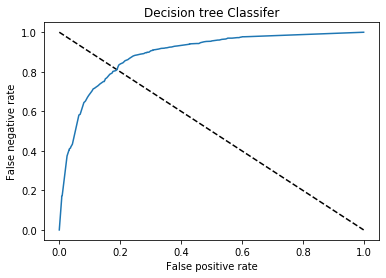

In [433]:
#Roc-AUC curve plot
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Decision Tree Classifer')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('Decision tree Classifer')
plt.show()

In [434]:
#Auc Roc curve is the graphical representation of confution matrix

In [435]:
#roc auc score
roc_auc_score(pred,y_test)

0.8191315167967216

We have roc_auc_score of 80%

## Conclusion

In [436]:
#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((Customer_Churn.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

82% of our answers are correct and there is no overfitting in this model